## Pyber Rideshare Analysis
Overall, urban cities have the most ride activity (~15-40), highest number of drivers, and lowest average fares (~$19-$30). Rural cities have the least ride activity (~3-10), lowest number of drivers, and highest average fares (~$25-$45). The data for suburban cities lies directly between urban and rural data.

It is unclear which factors cause the others. For example, more drivers could contribute to lower fares (becuase of less surge pricing) which could then influence people to use the service more often, leading to more ride activity. OR higher fares could lead to less ride activity which leads to less drivers signing up. There are many other possible scenarios, which means more analysis will be required to determine which factors are dependent on the others.

It is very clear that urban cities see the most rideshare activity when compared to suburban and rural cities, as there are overwhelmingly more drivers in urban cities, more rides being completed in urban cities, and the most fares exchanged in urban cities.

Therefore, urban cities are the most profitable type of city, and emphasis should be placed on marketing rideshare services in urban areas in order to maximize financial success for the company.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
combined_city_ride = pd.merge(ride_data, city_data, how="left", on="city")

# Display the data table for preview
combined_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [2]:
# Make a dataframe of combined df grouped by city
grouped_city_ride = combined_city_ride.groupby("city")

# find average of fares by city
avg_fare = grouped_city_ride["fare"].mean()

# city type
city_type = city_data.set_index('city')['type']

# sum of number of drivers per city
drivers_per_city = grouped_city_ride["driver_count"].mean()

# total number of rides per city
rides_per_city = grouped_city_ride["ride_id"].count()

# Make dataframe grouped by city with columns for average fare, city type, drivers per city, and rides per city
grouped_by_city = pd.DataFrame({"Average Fare": avg_fare, "City Type": city_type, "Drivers Per City": drivers_per_city, "Rides Per City": rides_per_city})
grouped_by_city.head()

,Average Fare,City Type,Drivers Per City,Rides Per City
Amandaburgh,24.641667,Urban,12,18
Barajasview,25.332273,Urban,26,22
Barronchester,36.422500,Suburban,11,16
Bethanyland,32.956111,Suburban,22,18
Bradshawfurt,40.064000,Rural,7,10


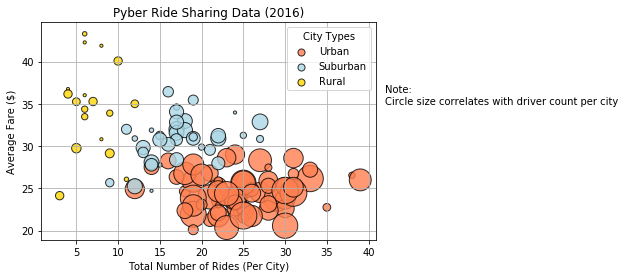

In [3]:
# Obtain the x and y coordinates for each of the three city types
# Make a separate dataframe for each city type from grouped dataframe
urban = grouped_by_city[grouped_by_city['City Type'] == 'Urban']
suburban = grouped_by_city[grouped_by_city['City Type'] == 'Suburban']
rural = grouped_by_city[grouped_by_city['City Type'] == 'Rural']

# Build the scatter plots for each city types
plt.scatter(urban["Rides Per City"], urban["Average Fare"], color="coral", edgecolors="black", s=10*urban["Drivers Per City"], alpha=.8, label="Urban")
plt.scatter(suburban["Rides Per City"], suburban["Average Fare"], color="lightblue", edgecolors="black", s=10*suburban["Drivers Per City"], alpha=.8, label="Suburban")
plt.scatter(rural["Rides Per City"], rural["Average Fare"], color="gold", edgecolors="black", s=10*rural["Drivers Per City"], alpha=.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend
my_legend = plt.legend(title = "City Types", loc="upper right")
my_legend.legendHandles[0]._sizes=[50]
my_legend.legendHandles[1]._sizes=[50]
my_legend.legendHandles[2]._sizes=[50]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city")

# Save figure
plt.savefig("graphs/bubble_plot.png")

# Show figure
plt.show()

## Total Fares by City Type

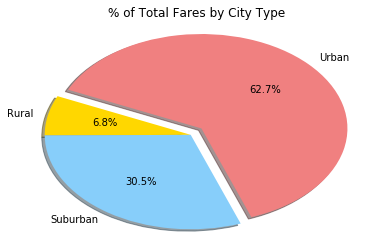

In [4]:
# Make a separate dataframe for each city type from grouped dataframe
urban_all = combined_city_ride[combined_city_ride['type'] == 'Urban']
suburban_all = combined_city_ride[combined_city_ride['type'] == 'Suburban']
rural_all = combined_city_ride[combined_city_ride['type'] == 'Rural']

# Calculate Type Percents
sum_urban_fares = urban_all["fare"].sum()
sum_suburban_fares = suburban_all["fare"].sum()
sum_rural_fares = rural_all["fare"].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [sum_urban_fares, sum_rural_fares, sum_suburban_fares]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=290)
plt.axis('auto')
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("graphs/pie_fares.png")

# Show Figure
plt.show()

## Total Rides by City Type

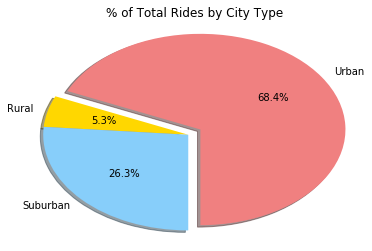

In [5]:
# Calculate Type Percents
total_urban_rides = urban_all["ride_id"].count()
total_suburban_rides = suburban_all["ride_id"].count()
total_rural_rides = rural_all["ride_id"].count()

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [total_urban_rides, total_rural_rides, total_suburban_rides]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis('auto')
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("graphs/pie_rides.png")

# Show Figure
plt.show()

## Total Drivers by City Type

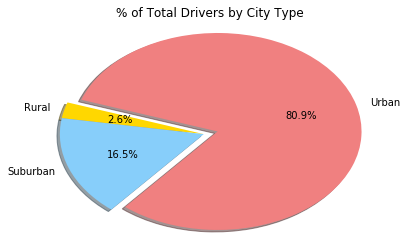

In [6]:
# Calculate Type Percents
total_urban_drivers = urban["Drivers Per City"].sum()
total_suburban_drivers = suburban["Drivers Per City"].sum()
total_rural_drivers = rural["Drivers Per City"].sum()

# Labels for the sections of our pie chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [total_urban_drivers, total_rural_drivers, total_suburban_drivers]

# The colors of each section of the pie chart
colors = ["lightcoral", "gold", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=230)
plt.axis('auto')
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("graphs/pie_drivers.png")

# Show Figure
plt.show()